## preparing BCell snRNA dataset using Scanpy


In [1]:
import scanpy as sc
import anndata as ad
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import sys

In [2]:
# load anndata objects
data_dir = '/ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_aggr/outs/'
atac_path = os.path.join(data_dir, 'adata_aggregated_peak.leiden.h5ad')
rna_path = os.path.join(data_dir, 'adata_aggregated_gene.leiden.h5ad')

In [7]:
adata_rna = ad.read(rna_path)
adata_rna

/ihome/djishnu/aks203/.conda/envs/celloracle/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'
    obsp: 'connectivities',

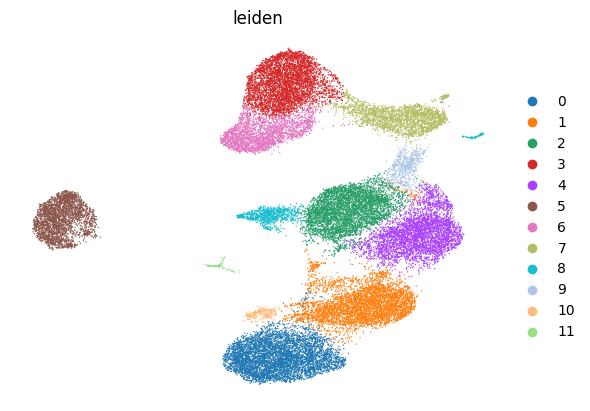

In [14]:
#umap colors by both cell metadata and var.names (gene_names)
sc.pl.umap(adata_rna, color=['leiden'], frameon=False) #save=True if you want to save the figure


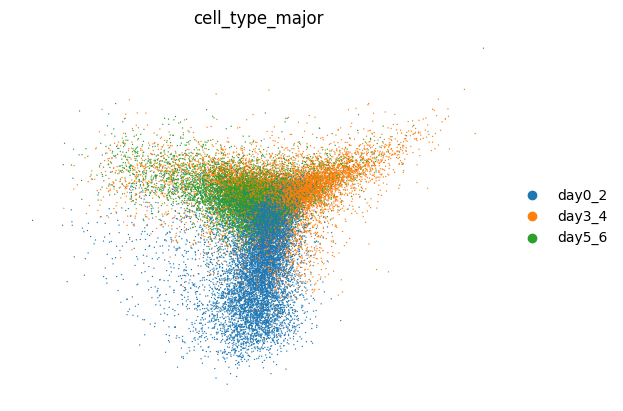

In [12]:
embedding_key = 'X_umap_features'
sc.pl.embedding(adata_rna, basis=embedding_key, color=['cell_type_major'], frameon=False)

In [4]:
adata_atac = ad.read(atac_path)
adata_atac

/ihome/djishnu/aks203/.conda/envs/celloracle/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'cell_type_major', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index', 'leiden_joint'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

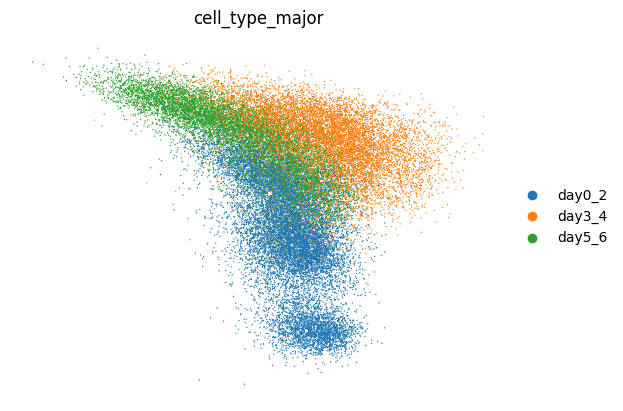

In [11]:
embedding_key = 'X_umap_features'
sc.pl.embedding(adata_atac, basis=embedding_key, color=['cell_type_major'], frameon=False)